## INTRODUCTION: DATA CLEANING
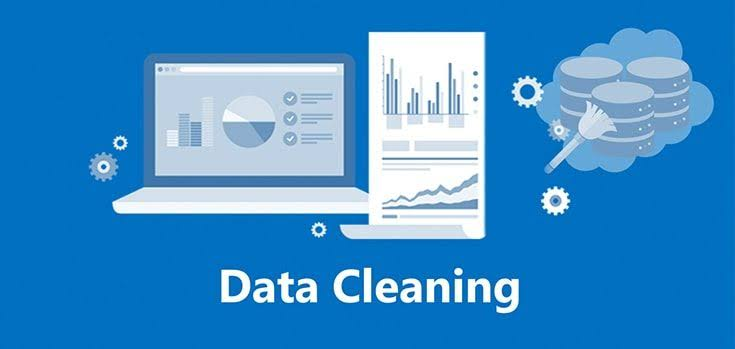<br>
The marketing team of the client business wants to reach out to customers who agreed to be contacted to get updates about the products and services of the clients business.But the dataset is filled with many irregularities such as duplicates,null values,customers without contact details,customers who don't want to be contacted,and unwanted characters attach to customer names.

Hence the need to cleanup the dataset,in other to enable the marketing team swiftly reach out to customer that opted in for updates on products and services for the client business.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import pandas as pd

In [2]:
#Reading in the data and displaying it
df = pd.read_excel('customer call list.xlsx')

In [3]:
#Viewing a sample of the dataset
df.sample(10)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
11,1011,Samwise,Gamgee,NaN,"612 Shire Lane, Shire",Yes,No,True
12,1012,Harry,...Potter,7066950392,2394 Hogwarts Avenue,Y,NaN,True
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
18,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False
10,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True
6,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
17,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,N,No,False
14,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,N,False
7,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
3,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True


### DEALING WITH DUPLICATES

In [4]:
#Getting the numbers of rows with duplicates
df.duplicated().sum() 

4

In [5]:
#To view all duplicated rows
df[df.duplicated()]

#ALTERNATIVELY:To display either the first or second duplicated row.
df[df.duplicated(keep='first')]

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
3,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
13,1012,Harry,...Potter,7066950392,2394 Hogwarts Avenue,Y,NaN,True
16,1014,Leslie,Knope,876|678|3469,343 City Parkway,Yes,No,False
23,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,N,True


In [6]:
#Deleting duplicates and resetting the index while deleting the old index.
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
#Deleting Columns not needed
df = df.drop(columns = 'Not_Useful_Column')

### LAST NAME COLUMN

In [8]:
#Checking the data type of the column
df['Last_Name'].dtype

dtype('O')

In [9]:
#Filtering for only unique values present in the column
df['Last_Name'].unique()

array(['Baggins', 'Nadir', '/White', 'Schrute', 'Snow', 'Swanson',
       '  Winger', 'Holmes', nan, 'Parker', 'Gamgee', '...Potter',
       'Draper', 'Knope', 'Flenderson_', 'Weasley', 'Scott', 'Kent',
       'Braton', 'Skywalker'], dtype=object)

In [10]:
#Using the strip function to clean out any irregularity found within the column
df['Last_Name'] = df['Last_Name'].str.strip('123._/')

### PHONE NUMBER COLUMN

In [11]:
#Checking the data type of the column
df['Phone_Number'].dtype

dtype('O')

In [12]:
#Filtering for only unique values present in the column
df['Phone_Number'].unique()

array(['123-545-5421', '123/643/9775', 7066950392, '123-543-2345',
       '876|678|3469', '304-762-2467', nan, 'N/a'], dtype=object)

In [13]:
#Use of a regular expression to keep all values stated below and remove values not found in the expression
df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]','')

In [14]:
#Converting of each value in the column to a string.
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: str(x))

In [15]:
#Using the lambda function to add a - in between the phone numbers that has been formated
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])

In [16]:
#Replacing the nan-- value with nothing
df['Phone_Number'] = df['Phone_Number'].str.replace('nan--','')

In [17]:
#Replacing the Na-- value with nothing
df['Phone_Number'] = df['Phone_Number'].str.replace('Na--','')

## ADDRESS COLUMN

In [18]:
#Splitting the address column into three columns,Street Address,State, and Zipcode.
df[['Street_Address','State','Zip_Code']] = df['Address'].str.split(',',2,expand=True)

In [19]:
#Deleting the Zip_Code column as it is entirely empty
df.drop(columns=['Zip_Code'],inplace=True)

## PAYING CUSTOMER COLUMN

In [20]:
#Getting the unique values in the column
df['Paying Customer'].unique()

array(['Yes', 'No', 'N', 'Y', 'N/a'], dtype=object)

In [21]:
#Replacing values with required ones
df['Paying Customer'] = df['Paying Customer'].str.replace('Yes','Y')
df['Paying Customer'] = df['Paying Customer'].str.replace('No','N')

df['Paying Customer'] = df['Paying Customer'].str.replace('Y','Yes')
df['Paying Customer'] = df['Paying Customer'].str.replace('N','No')
df['Paying Customer'] = df['Paying Customer'].str.replace('No/a','No')

## DO NOT CONTACT COLUMN

In [22]:
#Getting the unique values in the column
df['Do_Not_Contact'].unique()

array(['No', 'Yes', nan, 'Y', 'N'], dtype=object)

In [23]:
#Replacing values with required ones
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('Yes','Y')
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('No','N')

df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('Y','Yes')
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('N','No')

In [24]:
#Filling all null values with a blank space
df = df.fillna('')

## REMOVING INDIVIDUALS WITHOUT PHONE NUMBER

In [25]:
#Removing person's without phone number
for x in df.index:
    if df.loc[x,'Phone_Number'] == '':
        df.drop(x,inplace=True)
        
#ALTERNATIVELY
#df = df.dropna(subset='Phone_Number'), inplace = True)

In [26]:
#Removing person's that wish not to be contacted
for x in df.index:
    if df.loc[x,'Do_Not_Contact'] == 'Yes':
        df.drop(x,inplace=True)

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
#Deleting the Address Column as all required data has been extracted from it
df.drop(columns = 'Address',inplace = True)

In [29]:
#Saving the cleaned file as csv
df.to_csv('Cleaned Customer Call List.csv', index = False)

In [30]:
#Viewing the cleaned up file
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_Address,State
0,1001,Frodo,Baggins,123-545-5421,Yes,No,123 Shire Lane,Shire
1,1005,Jon,Snow,876-678-3469,Yes,No,123 Dragons Road,
2,1008,Sherlock,Holmes,876-678-3469,No,No,98 Clue Drive,
3,1010,Peter,Parker,123-545-5421,Yes,No,25th Main Street,New York
4,1013,Don,Draper,123-543-2345,Yes,No,2039 Main Street,
5,1014,Leslie,Knope,876-678-3469,Yes,No,343 City Parkway,
6,1015,Toby,Flenderson,304-762-2467,No,No,214 HR Avenue,
7,1016,Ron,Weasley,123-545-5421,No,No,2395 Hogwarts Avenue,
8,1017,Michael,Scott,123-643-9775,Yes,No,121 Paper Avenue,Pennsylvania
9,1020,Anakin,Skywalker,876-678-3469,Yes,No,910 Tatooine Road,Tatooine
